<a href="https://colab.research.google.com/github/vcwild/fashion-mnist-classifier/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

## Import dataset

In [2]:
dataset = keras.datasets.fashion_mnist

## Train-test split

In [ ]:
((X_train, y_train),(X_test, y_test)) = dataset.load_data()

# EDA

## Plot an image from the dataset

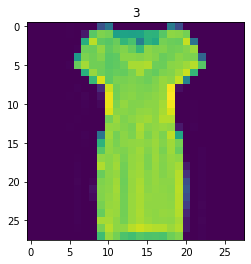

In [31]:
plt.imshow(X_train[20])
plt.title(y_train[20]);

## Plot 10 images

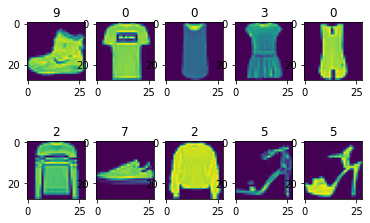

In [30]:
for i in range(0, 10, 1):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i])
  plt.title(y_train[i]);

## Add labels

In [5]:
labels = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

## Plot previous images with labels

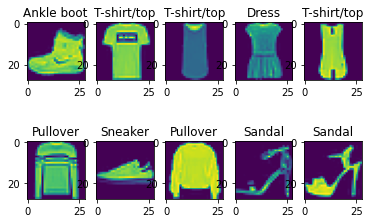

In [6]:
for i in range(0, 10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i])
  plt.title(labels[y_train[i]]);

## Verify color range

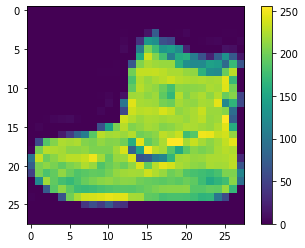

In [7]:
plt.imshow(X_train[0])
plt.colorbar();

# Preprocessing

## Apply normalization

In [8]:
X_train_proc = X_train/float(255)

# ML

## Define model

In [9]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dense(128, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.1),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

## Compile model

In [10]:
model.compile(
  optimizer='adam', 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy']
)

## Train

In [11]:
fitted = model.fit(X_train_proc, y_train, epochs=3, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5062 - accuracy: 0.8175 - val_loss: 0.4119 - val_accuracy: 0.8475
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8637 - val_loss: 0.3588 - val_accuracy: 0.8680
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3380 - accuracy: 0.8770 - val_loss: 0.3532 - val_accuracy: 0.8707
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.8856 - val_loss: 0.3307 - val_accuracy: 0.8813
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2950 - accuracy: 0.8910 - val_loss: 0.3364 - val_accuracy: 0.8803


### Plot epoch accuracy

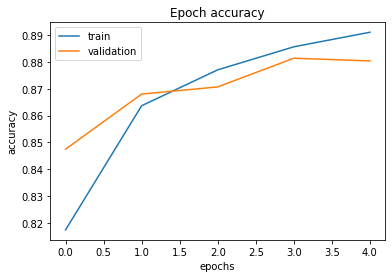

In [17]:
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.title('Epoch accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

### Plot epoch loss

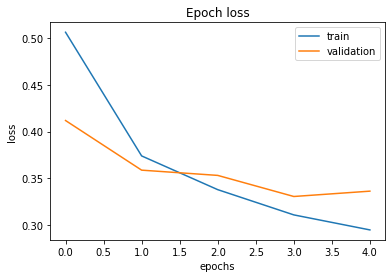

In [18]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.title('Epoch loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

### Save model

In [19]:
model.save('model.h5')

### Import saved model

In [ ]:
saved_model = load_model('model.h5')

## Test

### Apply predictions

In [14]:
results = model.predict(X_test)

In [21]:
saved_model_results = saved_model.predict(X_test)

### Compare predictions

In [22]:
item = 1
pd.DataFrame({
    'test_results': np.argmax(results[item]),
    'saved_model_results': np.argmax(saved_model_results[item]),
    'true_values': y_test[item]
}, index=[item])

,test_results,saved_model_results,true_values
1,2,2,2


## Validate

### Evaluate models

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.8170 - accuracy: 0.8457


[59.81698226928711, 0.8457000255584717]